# Multi-Layer Perceptron, MNIST
---
In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [103]:
# import libraries
import torch
import numpy as np

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [104]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

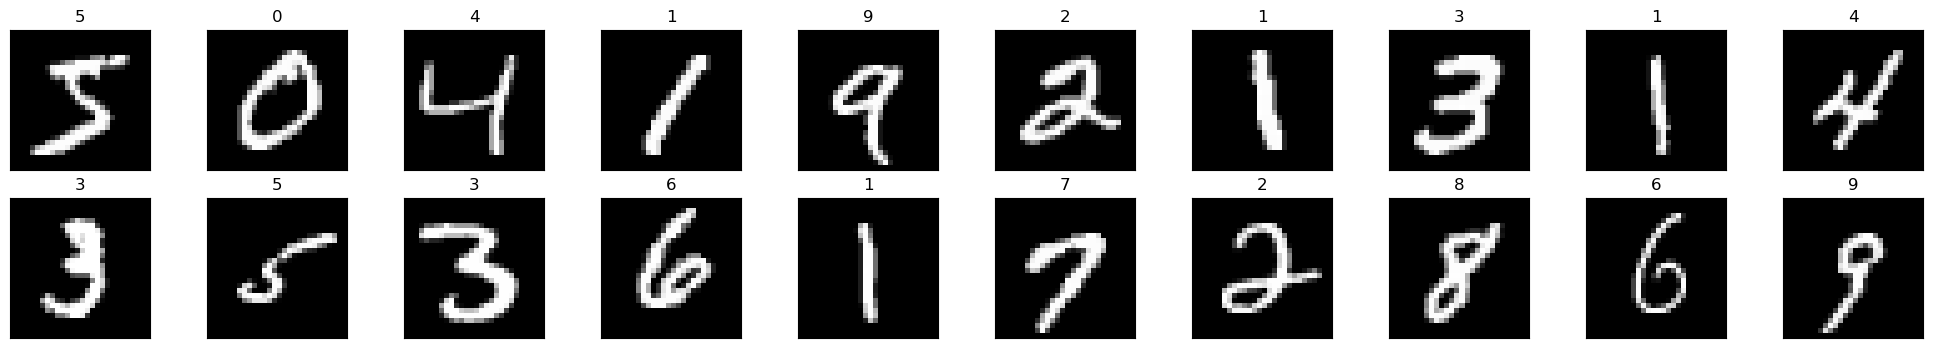

In [105]:
import matplotlib.pyplot as plt
# %matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

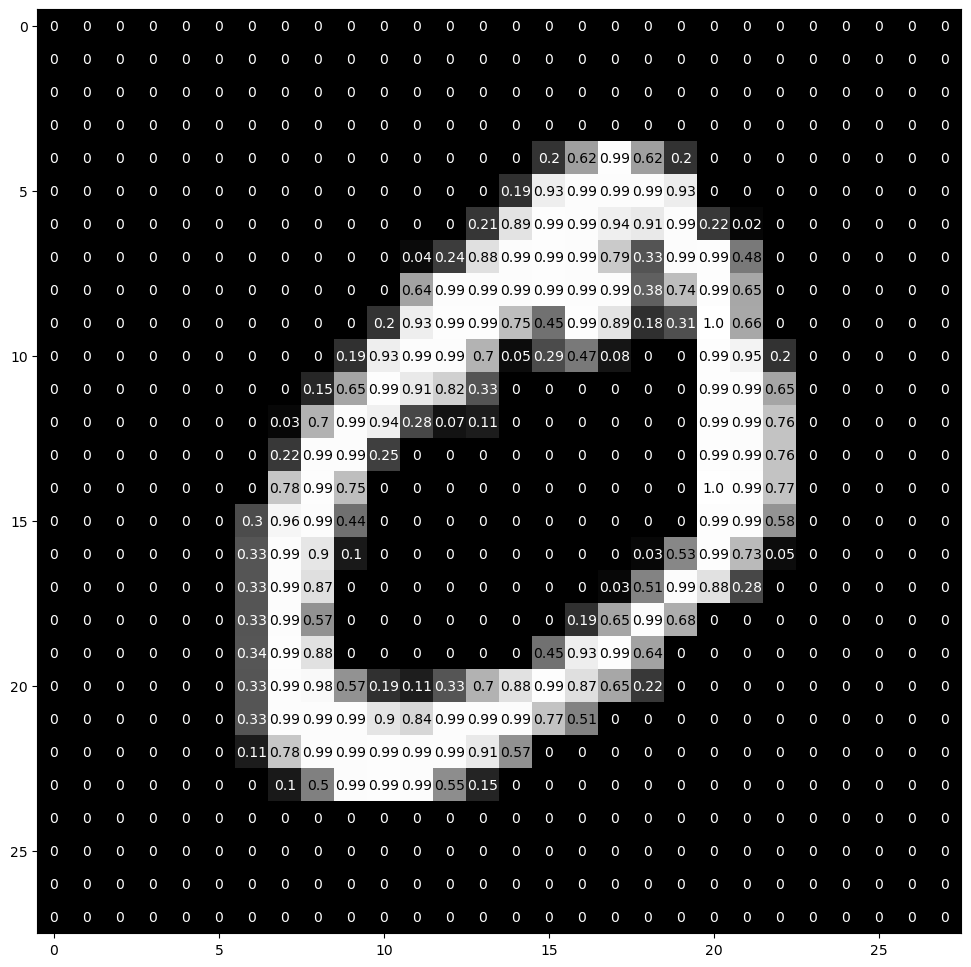

In [106]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [107]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [108]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [109]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.796558
Epoch: 2 	Training Loss: 0.411685
Epoch: 3 	Training Loss: 0.370102
Epoch: 4 	Training Loss: 0.348987
Epoch: 5 	Training Loss: 0.335513
Epoch: 6 	Training Loss: 0.325914
Epoch: 7 	Training Loss: 0.318609
Epoch: 8 	Training Loss: 0.312800
Epoch: 9 	Training Loss: 0.308030
Epoch: 10 	Training Loss: 0.304019
Epoch: 11 	Training Loss: 0.300580
Epoch: 12 	Training Loss: 0.297587
Epoch: 13 	Training Loss: 0.294949
Epoch: 14 	Training Loss: 0.292598
Epoch: 15 	Training Loss: 0.290485
Epoch: 16 	Training Loss: 0.288571
Epoch: 17 	Training Loss: 0.286825
Epoch: 18 	Training Loss: 0.285223
Epoch: 19 	Training Loss: 0.283746
Epoch: 20 	Training Loss: 0.282377
Epoch: 21 	Training Loss: 0.281103
Epoch: 22 	Training Loss: 0.279914
Epoch: 23 	Training Loss: 0.278800
Epoch: 24 	Training Loss: 0.277752
Epoch: 25 	Training Loss: 0.276765
Epoch: 26 	Training Loss: 0.275832
Epoch: 27 	Training Loss: 0.274948
Epoch: 28 	Training Loss: 0.274110
Epoch: 29 	Training Loss: 0.2

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [110]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.274083

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 88% (918/1032)
Test Accuracy of     3: 90% (914/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 87% (783/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 92% (946/1028)
Test Accuracy of     8: 88% (864/974)
Test Accuracy of     9: 90% (914/1009)

Test Accuracy (Overall): 92% (9231/10000)


In [111]:
# Save the model
torch.save(model.state_dict(), 'model_mnist_mlp.pth')

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

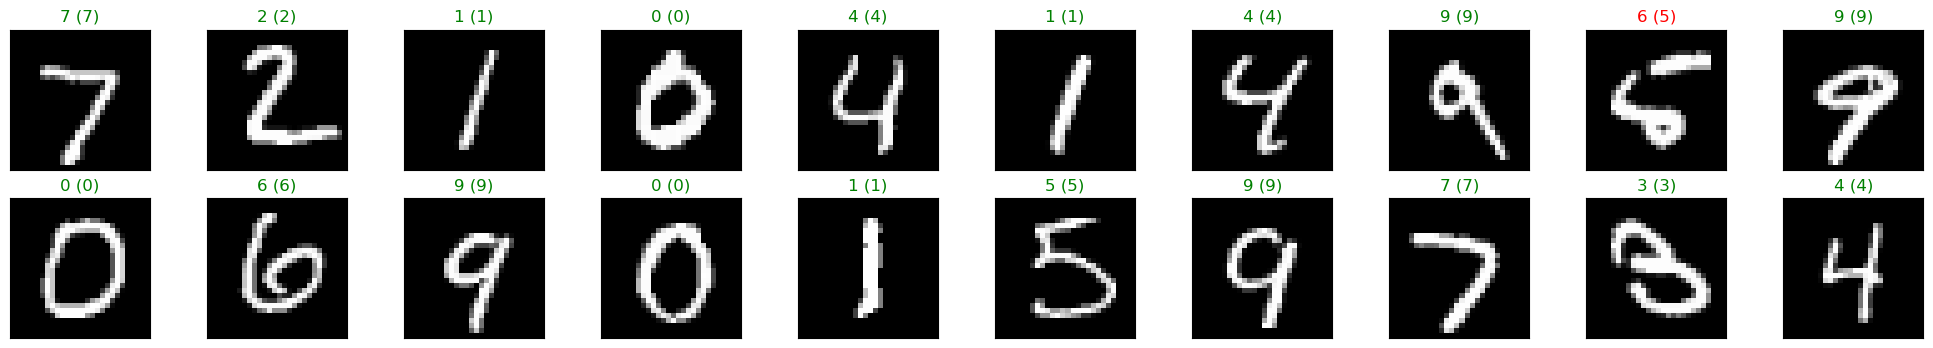

In [11]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

zhiyuan:

以上是从github选的一个简单的三层mlp识别mnist代码的原始版本。接下来，我们修改代码，加入各种mask形式。所有mask都先采用magnitude pruning，实现基于bi-mask。前向固定采用pruning，前向mask作用在weight上。反向mask分别采用三种形式进行对比实验：作用在梯度上、作用在weight上、作用在weight最后的更新上。

采用相同的iteration数，检查训练得到的模型的效果。不做预训练，而是用

In [12]:
model

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
N = 2
M = 4

def get_n_m_sparse_matrix(w):
    length = w.numel()
    group = int(length / M)
    w_tmp = w.t().detach().abs().reshape(group, M)
    index = torch.argsort(w_tmp, dim=1)[:, :int(M - N)]
    mask = torch.ones(w_tmp.shape, device=w_tmp.device)
    mask = mask.scatter_(dim=1, index=index, value=0).reshape(w.t().shape).t()
    return w * mask, mask 

In [14]:
# test 
weight_tmp = torch.randn(8, 4)
weight_tmp

tensor([[ 0.7883,  0.8237, -0.3657, -0.8952],
        [-1.2673, -0.6784,  0.6031,  0.2690],
        [ 0.0662, -0.5409, -1.4441,  0.9366],
        [-0.1406, -1.0910,  1.1591,  0.6034],
        [-0.8108,  0.0618, -0.0545,  1.1472],
        [-0.2905,  0.8483,  0.4298,  0.3785],
        [-0.1323, -1.0382, -0.6425,  0.6456],
        [ 0.7019, -0.4617, -0.3672, -0.2220]])

In [15]:
get_n_m_sparse_matrix(weight_tmp)

(tensor([[ 0.7883,  0.8237, -0.0000, -0.8952],
         [-1.2673, -0.0000,  0.0000,  0.0000],
         [ 0.0000, -0.0000, -1.4441,  0.9366],
         [-0.0000, -1.0910,  1.1591,  0.0000],
         [-0.8108,  0.0000, -0.0000,  1.1472],
         [-0.0000,  0.8483,  0.4298,  0.0000],
         [-0.0000, -1.0382, -0.6425,  0.6456],
         [ 0.7019, -0.0000, -0.0000, -0.0000]]),
 tensor([[1., 1., 0., 1.],
         [1., 0., 0., 0.],
         [0., 0., 1., 1.],
         [0., 1., 1., 0.],
         [1., 0., 0., 1.],
         [0., 1., 1., 0.],
         [0., 1., 1., 1.],
         [1., 0., 0., 0.]]))

In [78]:
model.fc1.weight.shape

torch.Size([512, 784])

In [90]:
from torch import autograd

# bimask linear function
class maskedlinear(autograd.Function):
    @staticmethod
    def forward(ctx, weight, inp_unf, forward_mask, backward_mask, decay = 0.0002):
        ctx.save_for_backward(weight, inp_unf, backward_mask)
        w_s = weight * forward_mask

        ctx.decay = decay
        ctx.mask = forward_mask

        out_unf = inp_unf.matmul(w_s)
        return out_unf

    @staticmethod
    def backward(ctx, g):
        # print("maskedlinear backward")
        # print("g shape", g.shape)
        weight, inp_unf, backward_mask = ctx.saved_tensors
        # print("weight shape", weight.shape)
        # print("inp_unf shape", inp_unf.shape)
        # print("backward_mask shape", backward_mask.shape)
        w_s = (weight * backward_mask).t()
        # print("w_s shape", w_s.shape)
        # g_w_s = inp_unf.transpose(1,2).matmul(g).sum(0)
        g_w_s = inp_unf.t().matmul(g)
        # print("g_w_s shape", g_w_s.shape)
        g_w_s = g_w_s + ctx.decay * (1 - ctx.mask) * weight
        g_inp_unf = g.matmul(w_s)
        return g_w_s , g_inp_unf, None, None, None


In [91]:
mylinear = maskedlinear.apply
# test
weight_tmp = torch.randn(8, 4)
weight_tmp

tensor([[-1.0673, -0.4834, -0.3078,  0.7069],
        [-0.9909, -0.0234,  0.1174, -0.2923],
        [ 0.4880, -0.8490,  0.2251, -0.5839],
        [-0.1116, -1.7154,  2.1825, -0.4681],
        [-0.2954, -1.7795, -0.6522,  1.2242],
        [-0.2834,  0.6645,  1.5506, -1.5331],
        [-0.7865,  0.4423, -1.2765,  0.1991],
        [-0.7922,  1.2429, -0.2010, -0.3622]])

In [92]:
x = torch.randn(2, 8)
x

tensor([[ 1.4041, -0.7280,  0.8904,  0.8336,  1.1823,  0.7104,  1.6793,  0.4992],
        [-1.0941, -2.0616, -1.2960,  0.8386, -0.8100, -0.7104,  0.9535,  0.7593]])

In [93]:
_, forward_mask = get_n_m_sparse_matrix(weight_tmp)
# backward_mask = torch.ones_like(weight_tmp)
_, backward_mask = get_n_m_sparse_matrix(weight_tmp)
forward_mask, backward_mask

(tensor([[1., 0., 1., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 1.],
         [0., 1., 1., 0.],
         [0., 1., 0., 1.],
         [0., 0., 1., 1.],
         [1., 0., 1., 0.],
         [1., 1., 0., 0.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 1.],
         [0., 1., 1., 0.],
         [0., 1., 0., 1.],
         [0., 0., 1., 1.],
         [1., 0., 1., 0.],
         [1., 1., 0., 0.]]))

In [94]:
output = mylinear(weight_tmp, x, forward_mask, backward_mask)
output

tensor([[-2.4934, -3.6694,  0.3451,  0.8309],
        [ 1.8591,  2.0469, -0.1515,  0.0808]])

In [95]:
class MaskedLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.N = 2
        self.M = 4
        
        self.forward_mask = torch.zeros(self.weight.view(self.weight.size(0), -1).t().shape).requires_grad_(False)
        self.backward_mask = torch.zeros(self.weight.view(self.weight.size(0), -1).t().shape).requires_grad_(False)

    def forward(self, x):
        w = self.weight.view(self.weight.size(0), -1).t()
        w_s, self.forward_mask = get_n_m_sparse_matrix(w)
        self.backward_mask = self.forward_mask
        # inp_unf = self.unfold(x)
        inp_unf = x
        out_unf = maskedlinear.apply(w, inp_unf, self.forward_mask, self.backward_mask)
        # out = self.fold(out_unf.transpose(1, 2))
        out = out_unf
        return out

In [96]:
import copy
model_saved = copy.deepcopy(model)

# switch all linear layers to maskedlinear for the original model
for name, module in model_saved.named_modules():
    if isinstance(module, nn.Linear):
    # if isinstance(module, nn.Linear) and not "fc3" in name:
        setattr(model, name, MaskedLinear(module.in_features, module.out_features, bias=module.bias is not None))
        # copy the weight and bias
        model.state_dict()[name + '.weight'] = module.weight
        if module.bias is not None:
            model.state_dict()[name + '.bias'] = module.bias

model

Net(
  (fc1): MaskedLinear(in_features=784, out_features=512, bias=True)
  (fc2): MaskedLinear(in_features=512, out_features=512, bias=True)
  (fc3): MaskedLinear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [97]:
# check the forward pass

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 6.241928

Test Accuracy of     0:  3% (31/980)
Test Accuracy of     1:  0% ( 0/1135)
Test Accuracy of     2:  0% ( 0/1032)
Test Accuracy of     3:  0% ( 0/1010)
Test Accuracy of     4:  0% ( 0/982)
Test Accuracy of     5:  0% ( 0/892)
Test Accuracy of     6:  0% ( 3/958)
Test Accuracy of     7:  0% ( 0/1028)
Test Accuracy of     8:  0% ( 0/974)
Test Accuracy of     9:  0% ( 0/1009)

Test Accuracy (Overall):  0% (34/10000)


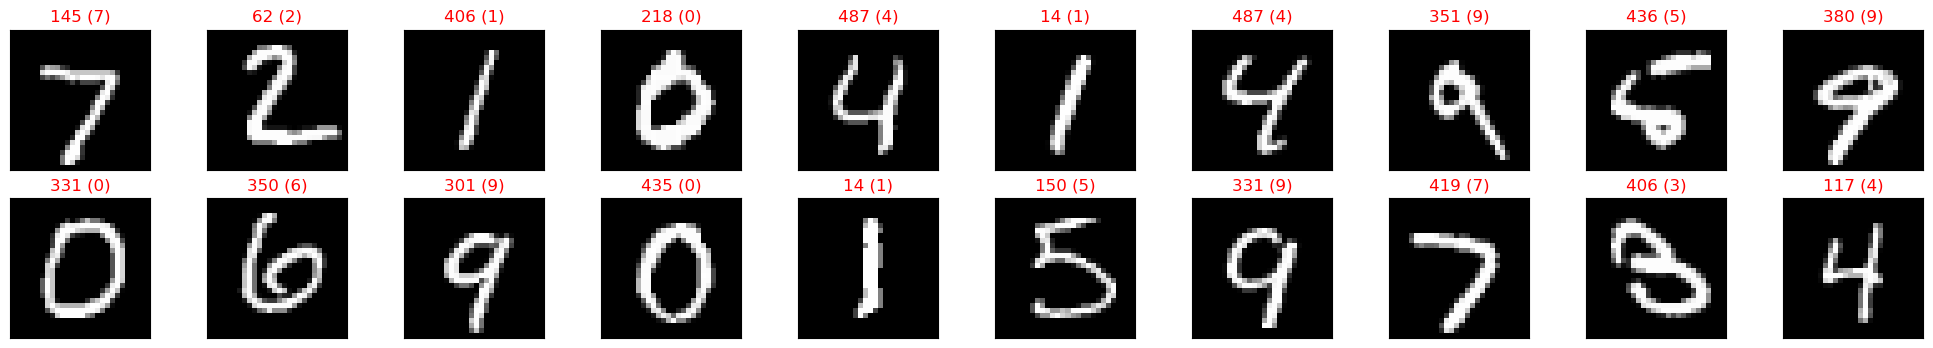

In [98]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

补充一轮训练。

In [99]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 6.242070
Epoch: 2 	Training Loss: 6.242070
Epoch: 3 	Training Loss: 6.242070
Epoch: 4 	Training Loss: 6.242070
Epoch: 5 	Training Loss: 6.242070
Epoch: 6 	Training Loss: 6.242070
Epoch: 7 	Training Loss: 6.242070
Epoch: 8 	Training Loss: 6.242070
Epoch: 9 	Training Loss: 6.242070
Epoch: 10 	Training Loss: 6.242070


有点训崩了，重写一个脚本，先将model weights 保存下来

In [101]:
# Save the model
torch.save(model_saved.state_dict(), 'model_mnist_mlp.pth')

In [102]:
# check the forward pass

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 6.241928

Test Accuracy of     0:  3% (31/980)
Test Accuracy of     1:  0% ( 0/1135)
Test Accuracy of     2:  0% ( 0/1032)
Test Accuracy of     3:  0% ( 0/1010)
Test Accuracy of     4:  0% ( 0/982)
Test Accuracy of     5:  0% ( 0/892)
Test Accuracy of     6:  0% ( 3/958)
Test Accuracy of     7:  0% ( 0/1028)
Test Accuracy of     8:  0% ( 0/974)
Test Accuracy of     9:  0% ( 0/1009)

Test Accuracy (Overall):  0% (34/10000)
